## EDA: Outlier Detection

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset 
path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"
folder = os.listdir(path)
df_filename = folder[2]

laptop_df = pd.read_csv(os.path.join(path,df_filename), index_col=0)
laptop_df

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\mian_\AppData\Local\Temp\ipykernel_10188\3506247966.py:2: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projectwork Platform\MEP-Machine-Learning\Laptop_Price_Prediction\dataset"


,Price,Color,GPU,Processor Speed,Display Width,Display Height,OS,Storage Type,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width,Bluetooth,Touchscreen,WiFi,Webcam
Brand,,,,,,,,,,,,,,,,,,,
dell,400.00,black,intel,4.200000,1920.000000,1080.000000,windows,ssd,2000.00,205.95,14.000000,5.98,28.571429,0.370370,0.208333,Yes,No,Yes,Yes
dell,175.00,black,intel,2.400000,1920.000000,1080.000000,windows,ssd,500.00,500.00,14.000000,16.00,12.500000,0.162037,0.091146,Yes,Yes,Yes,Yes
hp,85.00,black,intel,2.400000,1366.000000,768.000000,chrome,emmc,16.00,205.95,11.600000,4.00,7.327586,0.110677,0.062225,Yes,No,Yes,Yes
dell,101.25,other,other,1.400000,1366.000000,768.000000,windows,ssd,98.89,256.00,12.500000,8.00,8.100000,0.131836,0.074122,No,No,Yes,Yes
acer,50.00,black,other,1.600000,1366.000000,768.000000,chrome,ssd,98.89,16.00,11.600000,4.00,4.310345,0.065104,0.036603,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dell,429.00,black,intel,2.600000,1280.000000,720.000000,windows,unknown,98.89,960.00,14.000000,5.98,30.642857,0.595833,0.335156,No,No,Yes,No
acer,93.25,other,other,1.186174,779.242171,447.949319,unknown,unknown,98.89,205.95,9.076586,5.98,10.273686,0.208171,0.119668,No,No,No,No
dell,424.80,black,intel,2.800000,1920.000000,1080.000000,windows,unknown,98.89,120.00,12.500000,5.98,33.984000,0.393333,0.221250,Yes,Yes,Yes,Yes


## Approach: Outlier Detection

+ Univariate Analysis: on Outliers
+ Data Cleaning: removing outliers
+ Data Storage: saving as new dataset

## Univariate Analysis: on Outliers

+ Create boxplots to detect outliers
+ Create scatterplots per feature and combine with box plot

In [6]:
# Select only numerical data
laptop_df = laptop_df.select_dtypes([int, float])
laptop_df

,Price,Processor Speed,Display Width,Display Height,Hard Drive Capacity,SSD Capacity,Screen Size (cm),Ram Size,Price per Screen Size,Price per Display Height,Price per Display Width
Brand,,,,,,,,,,,
dell,400.00,4.200000,1920.000000,1080.000000,2000.00,205.95,14.000000,5.98,28.571429,0.370370,0.208333
dell,175.00,2.400000,1920.000000,1080.000000,500.00,500.00,14.000000,16.00,12.500000,0.162037,0.091146
hp,85.00,2.400000,1366.000000,768.000000,16.00,205.95,11.600000,4.00,7.327586,0.110677,0.062225
dell,101.25,1.400000,1366.000000,768.000000,98.89,256.00,12.500000,8.00,8.100000,0.131836,0.074122
acer,50.00,1.600000,1366.000000,768.000000,98.89,16.00,11.600000,4.00,4.310345,0.065104,0.036603
...,...,...,...,...,...,...,...,...,...,...,...
dell,429.00,2.600000,1280.000000,720.000000,98.89,960.00,14.000000,5.98,30.642857,0.595833,0.335156
acer,93.25,1.186174,779.242171,447.949319,98.89,205.95,9.076586,5.98,10.273686,0.208171,0.119668
dell,424.80,2.800000,1920.000000,1080.000000,98.89,120.00,12.500000,5.98,33.984000,0.393333,0.221250


In [21]:
nrows = 3
ncols = len(laptop_df.columns) // nrows + len(laptop_df.columns) % 3 
ncols

5

Columns: Index(['Price', 'Processor Speed', 'Display Width', 'Display Height',
       'Hard Drive Capacity', 'SSD Capacity', 'Screen Size (cm)', 'Ram Size',
       'Price per Screen Size', 'Price per Display Height',
       'Price per Display Width'],
      dtype='object')


TypeError: Axes.bxp() got an unexpected keyword argument 'axis'

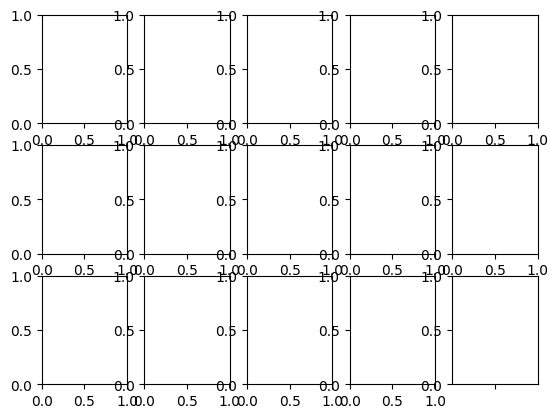

In [22]:
# Visualise outliers through boxplots 
def feature_boxplot(feature, feature_num = 0, ax = None):
    # Create boxplot
    sns.boxplot(laptop_df[feature], color="black", axis=ax) 
    
    # Add details 
    plt.xlabel(f"Feature {feature_num}")
    plt.ylabel(f"{feature}")
    plt.show()

print(f"Columns: {laptop_df.columns}")

# Create a subplot
nrows = 3
ncols = len(laptop_df.columns) // nrows + len(laptop_df.columns) % 3 

fig, boxplot = plt.subplots(nrows, ncols)
boxplot.flatten()

for num, feature in enumerate(laptop_df.columns):
    boxplot_i = boxplot[num]
    feature_boxplot(feature, num + 1, boxplot[num])


# # feature_boxplot("Ram Size", 1)
# # feature_boxplot("Processor Speed", 2)
# # feature_boxplot("Display Width", 3)
# feature_boxplot()